In [2]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk import tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import wordcloud
from scipy import spatial
import gensim
from gensim import corpora
from sklearn.neighbors import BallTree


In [28]:
import os
import math
fac_keys = list(facilities.keys())
cols = ['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive']
cols.extend(fac_keys)
print(cols)
all_hotels = pd.DataFrame(columns=cols)
arr = os.listdir('./hotels-with-row-facilities/')
for i in arr:
    if i.endswith('csv'):
        df = pd.read_csv('hotels-with-row-facilities/' + i)
#         print(len(df))
#         l = list(df.columns)
        all_hotels = all_hotels.append(df, ignore_index=True)
    all_hotels.info()
all_hotels.to_csv('all_hotels_row.csv', index=False)


['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive', 'staff', 'location', 'food/drink', 'dirty', 'bed', 'comfort', 'price', 'bathroom', 'parking', 'restaurant', 'noisiness', 'tv', 'internet', 'fitness', 'covid', 'temperature']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  2536 non-null   object 
 1   Room_info      2536 non-null   object 
 2   Nights_stayed  2536 non-null   object 
 3   Date of stay   2536 non-null   object 
 4   Travel_type    2536 non-null   object 
 5   Review         2536 non-null   object 
 6   Grade          2536 non-null   float64
 7   Title          2536 non-null   object 
 8   Positive       2536 non-null   object 
 9   staff          2536 non-null   object 
 10  location       2536 non-null   object 
 11  food/drink     2536 non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30708 entries, 0 to 30707
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  30708 non-null  object 
 1   Room_info      30708 non-null  object 
 2   Nights_stayed  30708 non-null  object 
 3   Date of stay   30708 non-null  object 
 4   Travel_type    30708 non-null  object 
 5   Review         30708 non-null  object 
 6   Grade          30708 non-null  float64
 7   Title          30708 non-null  object 
 8   Positive       30708 non-null  object 
 9   staff          30708 non-null  object 
 10  location       30708 non-null  object 
 11  food/drink     30708 non-null  object 
 12  dirty          30708 non-null  object 
 13  bed            30708 non-null  object 
 14  comfort        30708 non-null  object 
 15  price          30708 non-null  object 
 16  bathroom       30708 non-null  object 
 17  parking        30708 non-null  object 
 18  restau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42770 entries, 0 to 42769
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  42770 non-null  object 
 1   Room_info      42770 non-null  object 
 2   Nights_stayed  42770 non-null  object 
 3   Date of stay   42770 non-null  object 
 4   Travel_type    42770 non-null  object 
 5   Review         42770 non-null  object 
 6   Grade          42770 non-null  float64
 7   Title          42770 non-null  object 
 8   Positive       42770 non-null  object 
 9   staff          42770 non-null  object 
 10  location       42770 non-null  object 
 11  food/drink     42770 non-null  object 
 12  dirty          42770 non-null  object 
 13  bed            42770 non-null  object 
 14  comfort        42770 non-null  object 
 15  price          42770 non-null  object 
 16  bathroom       42770 non-null  object 
 17  parking        42770 non-null  object 
 18  restau

In [3]:
facilities = dict()

facilities['staff'] = ['staff', 'service', 'polite', 'rude', 'helpful', 'friendly', 'employee', 'reception']
facilities['location'] = ['view', 'location', 'place', 'victoria', 'sighting', 'airport', 'area', 'central', 'centre',
                          'city', 'near']
facilities['food/drink'] = ['meal', 'breakfast', 'lunch', 'brunch', 'dinner', 'plate', 'dish', 'hungry', 'food', 'drink', 'soda', 'coffee', 'tea']
facilities['dirty'] = ['clean', 'dirty', 'filthy', 'dust', 'cleanliness']
facilities['bed'] = ['bed', 'sheet', 'pillow', 'mattress', 'sleep']
facilities['comfort'] = ['comfort', 'comfortable', 'comfy', 'decor', 'modern', '']
facilities['price'] = ['price', 'expensive', 'cheap', 'money', 'pricey', 'paid']
facilities['bathroom'] = ['towel', 'shower', 'toilet', 'bath', 'water', 'bath', 'bathroom']
facilities['parking'] = ['car', 'parking']
facilities['restaurant'] = ['restaurant', 'menu', 'bar']
facilities['noisiness'] = ['loud', 'quiet', 'noisy', 'noise', 'sound', 'quiet']
facilities['tv'] = ['television', 'tv', 'screen', 'programm']
facilities['internet'] = ['wifi', 'signal', 'download', 'network', 'internet']
facilities['fitness'] = ['gym', 'fitness', 'spa', 'workout', 'pool']
facilities['covid'] = ['covid', 'covid19', 'virus']
facilities['temperature'] = ['air', 'conditioning', 'heating', 'temperature']

# facilities['heating'] = ['air', 'service', 'polite', 'rude', 'helpfull', 'friendly']


TypeError: can only concatenate str (not "float") to str

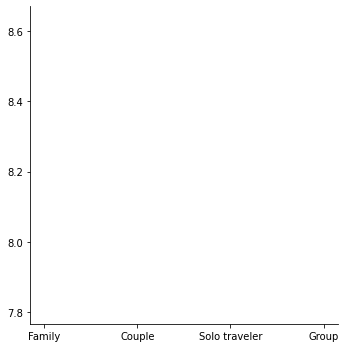

In [13]:

sns.lmplot(data=all_hotels, x="Travel_type", y="Grade", x_jitter=.5)

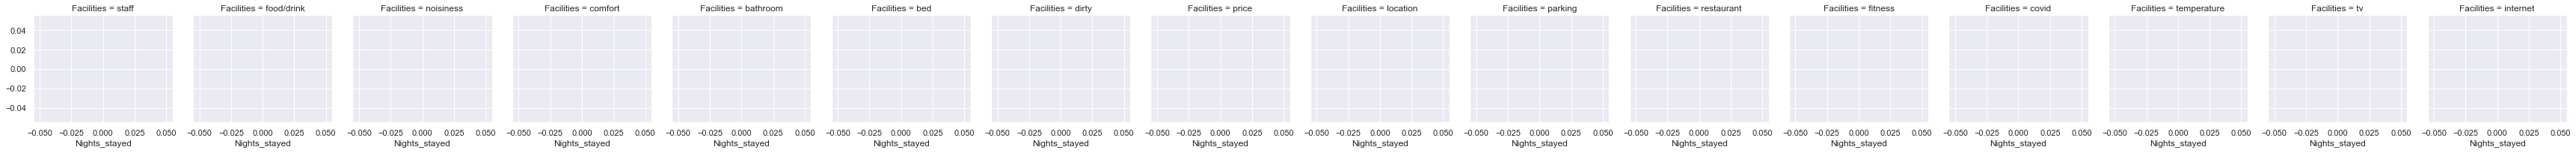

In [68]:
g = sns.FacetGrid(all_hotels, col="Facilities", hue="Positive")
g.map(sns.scatterplot, "Nights_stayed")

In [44]:
all_hotels = pd.read_csv("all_hotels_row.csv")
all_hotels = all_hotels.drop(['Review'], axis = 1)
all_hotels = all_hotels.drop(['Title'], axis = 1)
# all_hotels.info()
all_hotels['Room_info'] = all_hotels['Room_info'].str.replace(' \(\d Adults\)', '')
all_hotels = all_hotels.rename(columns={'Date of stay': 'Date'})
all_hotels['Date'] = pd.to_datetime(all_hotels['Date'],format='%B %Y')

<ipython-input-44-b597f1a6f0b6>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  all_hotels['Room_info'] = all_hotels['Room_info'].str.replace(' \(\d Adults\)', '')


In [24]:
len(all_hotels.Room_info.unique())

102

In [307]:
all_hotels["Date of stay"] = all_hotels['Date of stay'].str[:-5]
all_hotels

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities
0,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,staff
1,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,food/drink
2,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,staff
3,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,noisiness
4,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,comfort
...,...,...,...,...,...,...,...,...,...,...
109303,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,bathroom
109304,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,dirty
109305,United Kingdom,Superior Double Room,1,July,Family,The room had no tea/coffee equipment I.e. Cup...,6.7,Loved the architecture and the live jazz in th...,0,food/drink
109306,United Kingdom,Superior Double Room,1,July,Family,The room had no tea/coffee equipment I.e. Cup...,6.7,Loved the architecture and the live jazz in th...,0,bathroom


In [104]:
# all_hotels["Date"] = pd.to_datetime(all_hotels['Date'])
all_hotels = all_hotels.sort_values(by="Date")
all_hotels

,Guest_country,Room_info,Nights_stayed,Date,Travel_type,Grade,Positive,staff,location,food/drink,...,price,bathroom,parking,restaurant,noisiness,tv,internet,fitness,covid,temperature
48494,United Kingdom,Executive Double Room,1,2018-07-01,Family,10.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32160,Norway,Standard Double or Twin Room,2,2018-07-01,Family,9.6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32159,Hong Kong,Superior Single Room,3,2018-07-01,Solo traveler,7.9,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32158,United Kingdom,Standard Double or Twin Room,2,2018-07-01,Group,8.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32156,Australia,Standard Double or Twin Room,2,2018-07-01,Couple,8.3,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37860,France,Premium Room with Balcony and Burj Khalifa View,2,2021-03-01,Couple,8.0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
19667,United Kingdom,Standard Room,1,2021-03-01,Solo traveler,10.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
21679,United Kingdom,Standard Room,2,2021-03-01,Solo traveler,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
28530,Isle of Man,Standard Room,1,2021-03-01,Couple,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
new_f = new_f.groupby('Room_info').filter(lambda x : len(x)>300)

In [45]:
new_f = all_hotels.groupby('Guest_country').filter(lambda x : len(x)>500)

In [357]:
new_f.reset_index()
new_f

,Guest_country,Room_info,Nights_stayed,Date,Travel_type,Grade,Positive,staff,location,food/drink,...,price,bathroom,parking,restaurant,noisiness,tv,internet,fitness,covid,temperature
10,United Kingdom,Superior Double Room,1,2021-01-01,Family,10.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,United Kingdom,Superior Double Room,2,2020-12-01,Couple,10.0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
16,United Kingdom,Studio Double (Family),1,2020-12-01,Family,10.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
20,United Kingdom,Superior Double Room,1,2020-12-01,Couple,10.0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
29,United Kingdom,Superior Double Room,1,2020-12-01,Group,10.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48490,United Kingdom,Superior Double Room,1,2018-07-01,Solo traveler,4.6,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
48491,United Kingdom,Superior Twin Room,1,2018-08-01,Couple,10.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48492,United Kingdom,Superior Double Room,1,2018-08-01,Couple,10.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
48493,United Kingdom,Superior Twin Room,1,2018-07-01,Solo traveler,5.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
l = new_f['Guest_country'].factorize()
new_f['Guest_country'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['United Kingdom', 'Ireland', 'United States of America', 'Australia',
        'Saudi Arabia', 'United Arab Emirates'],
       dtype='object'))

In [48]:
l = new_f['Room_info'].factorize()
new_f['Room_info'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([ 0,  0,  1, ...,  0,  2, 11]),
 Index(['Superior Double Room', 'Studio Double (Family)', 'Superior Twin Room',
        'Studio King (Family)', 'Superior Double Room - Disability Access',
        'Superior Twin Room with Internal View',
        'Superior Double Room with Internal View',
        'Studio Double Room with London Eye View', 'Superior King Room',
        'King Studio', 'Executive Double Room - River View',
        'Executive Double Room', 'Superior Room with River view',
        'Standard Room', 'Premium Room with River View',
        'Standard Double or Twin Room', 'Premium Room', 'Single Room',
        'Superior Room with Runway View', 'Superior Room',
        'Standard Double Room - Atrium View'],
       dtype='object'))

In [208]:
all_hotels = all_hotels.loc[(all_hotels['Facilities'] == 'fitness') | (all_hotels['Facilities'] ==  'food/drink') |( all_hotels['Facilities'] ==  'location')]
all_hotels

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities
1,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,food/drink
13,United Kingdom,Superior King Room,3,January,Solo traveler,Luxurious room and bathroom; Modern and clea...,10.0,Exceptional,1,location
17,United Kingdom,Superior King Room,3,January,Solo traveler,Luxurious room and bathroom; Modern and clea...,10.0,Exceptional,1,food/drink
25,United Kingdom,King Studio,2,February,Solo traveler,"Really like the breakfast, the selection was ...",7.0,Pleasant,1,food/drink
28,United Kingdom,King Studio,1,January,Couple,Stayed here 1 night\nAs you walk into the hot...,8.0,Pleasant stay in a big trendy room,1,location
...,...,...,...,...,...,...,...,...,...,...
109288,United Kingdom,Executive Double Room,2,August,Couple,Executive Room to rear not clear on booking ...,5.0,Disappointing,0,food/drink
109293,United Arab Emirates,Superior Double Room,3,August,Family,"very small rooms, no view and even at the tim...",6.2,Pleasant,0,location
109298,United Kingdom,Superior Double Room,3,August,Couple,"Swimming pool not available,and the smell fro...",6.7,Pleasant,0,fitness
109301,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,food/drink


In [96]:
# sns.catplot(x="Travel_type", y="Nights_stayed",hue="food/drink", kind='violin', data=all_hotels, aspect=15/8)
sns.catplot(x = "Date", y = "Guest_country", kind = 'violin', hue="Positive",split="True",data = all_hotels, aspect=12/4);
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

/home/behemoth/anaconda3/envs/insurance-faq-engine-february-2021-tim2/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


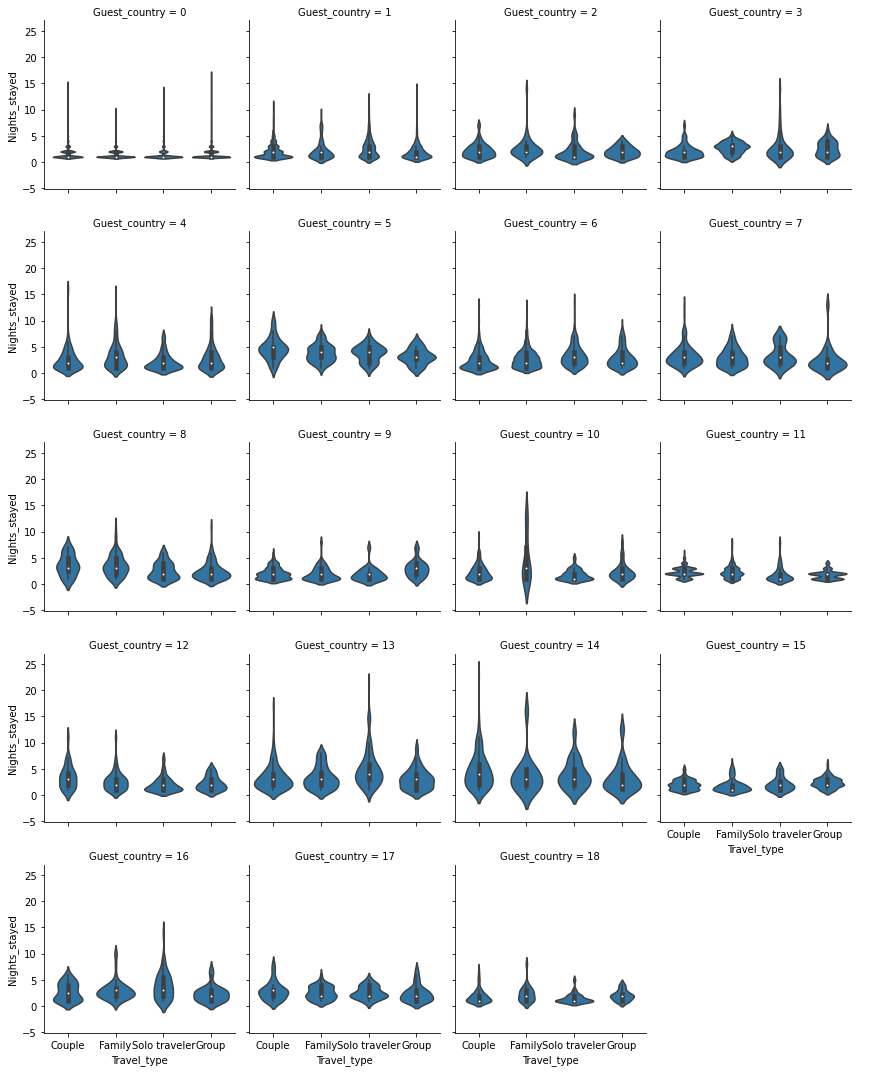

In [112]:
# families most frequent in August
g = sns.FacetGrid(new_f, col="Guest_country", col_wrap=4)
g.map(sns.violinplot, "Travel_type","Nights_stayed", data=new_f)
g.add_legend()
# sns.catplot(x="Date of stay", col="Nights_stayed", hue="Travel_type", kind="count", palette="ch:.25", data=all_hotels, aspect=10/5)

TypeError: 'NoneType' object is not iterable

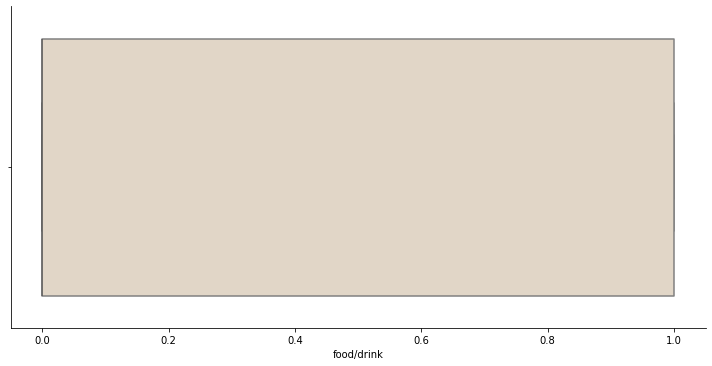

In [142]:
sns.catplot(x="food/drink", hue="price", kind="boxen", palette="ch:.25", data=new_f, aspect=10/5)

In [136]:
new_df1 = new_f.iloc[:, 5:10]
new_df1.head()

,Grade,Positive,staff,location,food/drink
48494,10.0,0,0,0,0
32158,8.3,0,0,0,0
32156,8.3,0,0,1,1
32151,9.6,0,0,0,0
32147,8.8,0,1,0,0


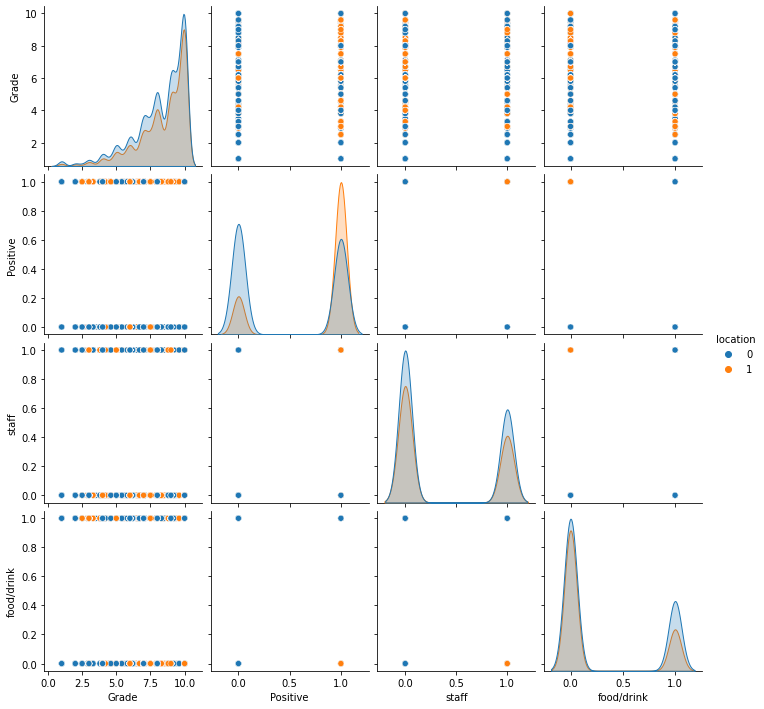

In [137]:
sns.pairplot(hue="location",data=new_df1)

<AxesSubplot:xlabel='Guest_country', ylabel='Count'>

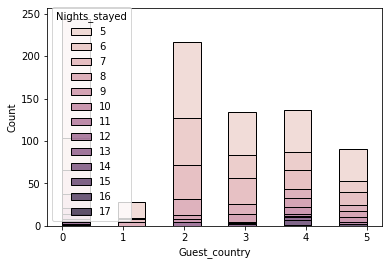

In [72]:
new_f_ns = new_f.loc[new_f['Nights_stayed'] >= 5]

sns.histplot(x="Guest_country", hue="Nights_stayed", multiple ="stack",data=new_f_ns)


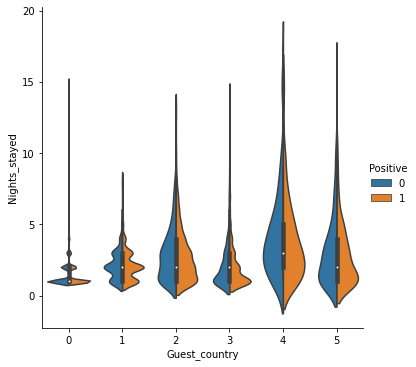

In [50]:
new_f_p = new_f.loc[new_f['noisiness'] == 1]
sns.catplot(x="Guest_country", y="Nights_stayed", hue="Positive",kind="violin", split=True,data=new_f)

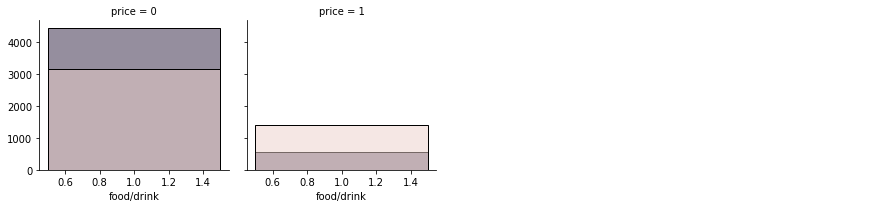

In [19]:
g = sns.FacetGrid(new_f, col="price", col_wrap=4)
g.map(sns.histplot,"food/drink", hue="Positive",data=new_f_p)
g.add_legend()
plt.show()
# show percentage of 

<AxesSubplot:xlabel='Guest_country', ylabel='Count'>

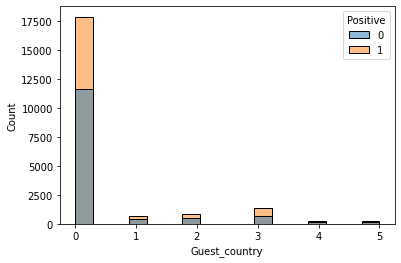

In [43]:
sns.histplot(x="Guest_country", hue="Positive",data=new_f)

In [75]:
new_f_l = new_f.loc[ (new_f['Room_info'].str.contains('Exec'))]
plt.figure(figsize=(15,8))
sns.histplot(x="Date", hue="internet", multiple="stack", stat="count", data=new_f)
# show percentage of 

AttributeError: Can only use .str accessor with string values!

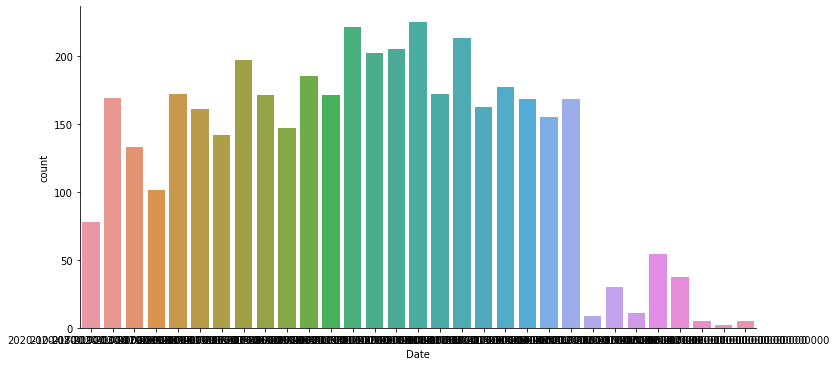

In [37]:
new_f_l = new_f.loc[new_f['restaurant'] == 1]
# print(new_f_l.Room_info.unique())
sns.catplot(x="Date", kind="count", data=new_f_l, aspect=14/6)
# show percentage of 

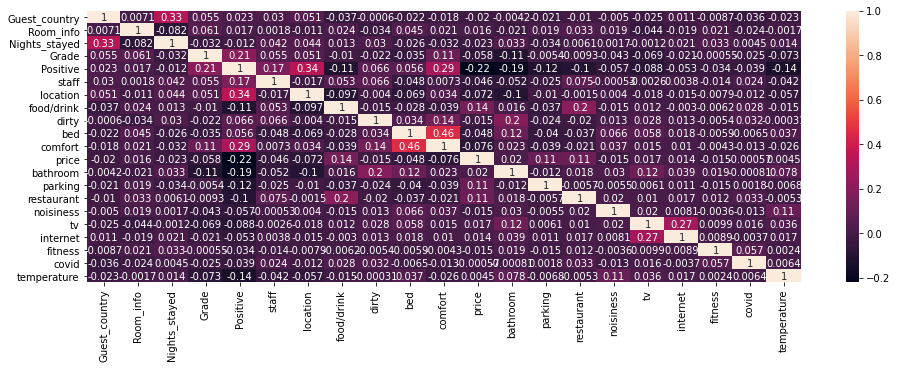

In [38]:
import matplotlib.pyplot as plt
corr = new_f.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [68]:
len(new_f)

43961

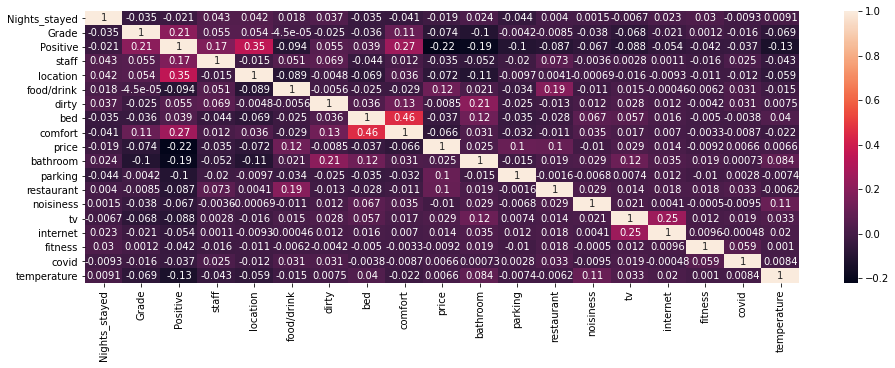

In [39]:
import matplotlib.pyplot as plt
corr = all_hotels.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df = all_hotels[['Room_info','Date of stay','Guest_country','Facilities']]

sns.pairplot(data=df, kind="scatter")
plt.show()

In [33]:
sns.heatmap(all_hotels)

ValueError: could not convert string to float: 'Kuwait'

In [322]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(all_hotels.Facilities, all_hotels.Travel_type))

(420.4907875642115,
 1.9939231779224118e-62,
 45,
 array([[ 2975.6177041 ,  1354.95081787,   780.77839682,   995.6530812 ],
        [ 4041.71423867,  1840.39905588,  1060.51364036,  1352.3730651 ],
        [ 4490.46876715,  2044.73992754,  1178.26325612,  1502.52804918],
        [  392.72111831,   178.82599627,   103.04689501,   131.40599041],
        [ 4180.5796465 ,  1903.63157317,  1096.95081787,  1398.83796245],
        [ 1150.39027336,   523.83148534,   301.85324953,   384.92499177],
        [ 6583.19482563,  2997.66505654,  1727.37791378,  2202.76220405],
        [  392.23387126,   178.60412779,   102.91904527,   131.24295568],
        [10554.25824276,  4805.89318257,  2769.35334102,  3531.49523365],
        [ 1574.29520255,   716.85706444,   413.08252827,   526.76520474],
        [  788.85296593,   359.20507191,   206.98873824,   263.95322392],
        [ 3002.41629158,  1367.15358437,   787.81013284,  1004.61999122],
        [ 2736.37940498,  1246.01339335,   718.0041717 ,   915

In [319]:
pd.crosstab(all_hotels.Facilities, all_hotels.Travel_type)


Travel_type,Couple,Family,Group,Solo traveler
Facilities,,,,
bathroom,2960,1257,855,1035
bed,4186,1709,1135,1265
comfort,4589,1900,1238,1489
covid,408,205,66,127
dirty,4150,1933,1111,1386
fitness,1165,606,244,346
food/drink,6540,3174,1658,2139
internet,316,171,101,217
location,10498,5048,2668,3447
